## ** ML-Based Fraud Detection Engine: EDA and Data Preprocessing

### Introduction 
* This notebook covers exploratory data analysis (EDA) and preprocessing steps applied to the e-commerce and bank transaction datasets.  
* The  goal is to clean the data, engineer meaningful features, and address class imbalance to prepare for fraud detection modeling.

### 🔹 Step 1: Load & Inspect Raw Data
We begin by loading the datasets and inspecting their shape, column types, and missing values. This helps identify any immediate cleaning needs.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
ip_df = pd.read_csv("../data/raw/IpAddress_to_Country.csv")
credit_df = pd.read_csv("../data/raw/creditcard.csv")


In [7]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [8]:
credit_df.shape, credit_df.head()

((284807, 31),
    Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
   

In [9]:
print("Fraud Data:")
print(fraud_df.info())
print(fraud_df.head())

Fraud Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              1

In [10]:
print("\nCredit Card Data:")
print(credit_df.info())
print(credit_df.head())


Credit Card Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  floa

### 🔹 Step 2: Handle Missing Values

In [11]:
# Check missingness
fraud_df.isnull().sum(), credit_df.isnull().sum()

(user_id           0
 signup_time       0
 purchase_time     0
 purchase_value    0
 device_id         0
 source            0
 browser           0
 sex               0
 age               0
 ip_address        0
 class             0
 dtype: int64,
 Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64)

##### Missing Values
* After loading and inspecting the datasets, I confirmed that there are no missing values in either `Fraud_Data.csv` or `creditcard.csv`. This means I can proceed without any imputation or row removal, simplifying the preprocessing pipeline.


###  🔹 Step 3: Data Cleaning 
* Duplicates may cause bias, so we remove them. Also, converting timestamp columns to datetime enables time-based feature engineering.

In [12]:
# First lEt's Check if htere are any duplciate ...
fraud_df.duplicated().sum(), credit_df.duplicated().sum()


(np.int64(0), np.int64(1081))

In [13]:
# Remove duplicates from creadit dataframe 
credit_df.drop_duplicates(inplace=True)

# Fix data types
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

### 🔹 Step 4: Exploratory Data Analysis (EDA)
* Analyze the distribution of key features and explore the imbalance between fraud and legitimate transactions. Visualizations help identify patterns useful for modeling.

📊 Univariate Analysis 

🎯 Goal:

 *   Understand the distribution and summary statistics of each column.
 *   Detect outliers, skewness, unusual values, and common categories.

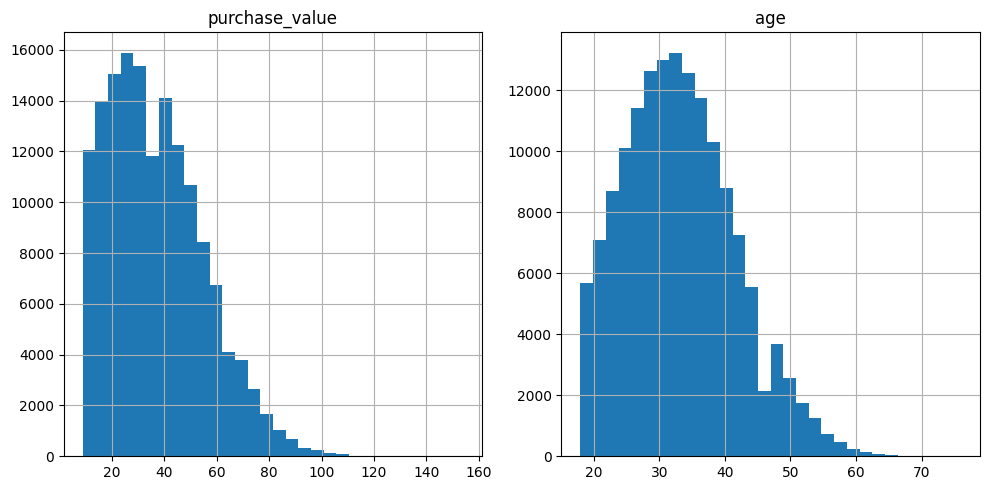

In [14]:
#  1. Numerical Features... use Histograms
num_cols = ['purchase_value', 'age']
fraud_df[num_cols].hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()


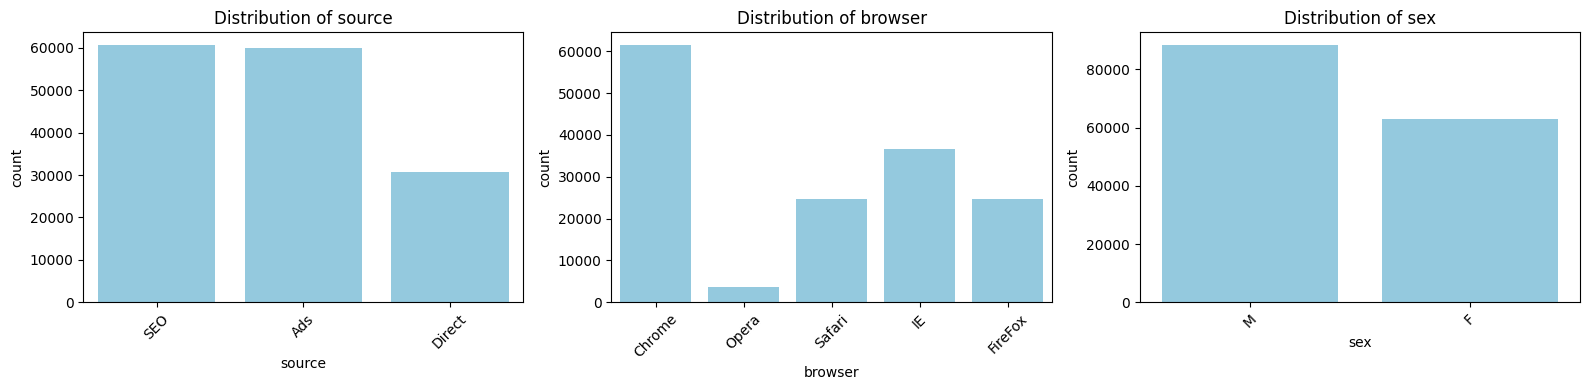

In [15]:
# 2. Categorical Features
cat_cols = ['source', 'browser', 'sex']
n_cols = 3  # Number of columns in subplot grid
fig, axes = plt.subplots(1, n_cols, figsize=(16, 4))  # 1 row, 3 columns

for i, col in enumerate(cat_cols):
    sns.countplot(data=fraud_df, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


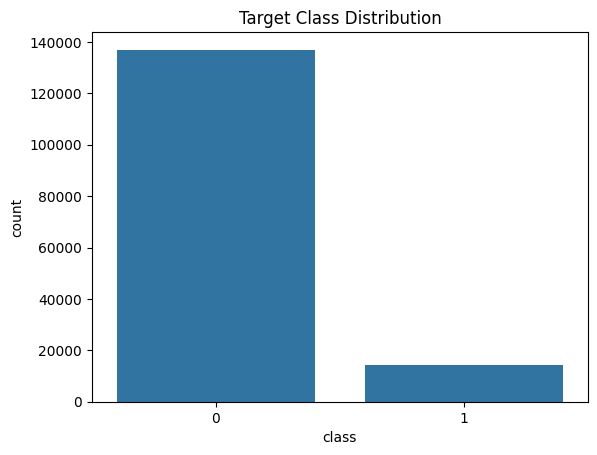

class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


In [16]:
# 3. Target Variable (Class Imbalance)
sns.countplot(data=fraud_df, x='class')
plt.title('Target Class Distribution')
plt.show()

fraud_rate = fraud_df['class'].value_counts(normalize=True)
print(fraud_rate)

🔗 Bivariate Analysis

🎯 Goal:

* Understand the relationships between variables, especially between predictors and the target (class).

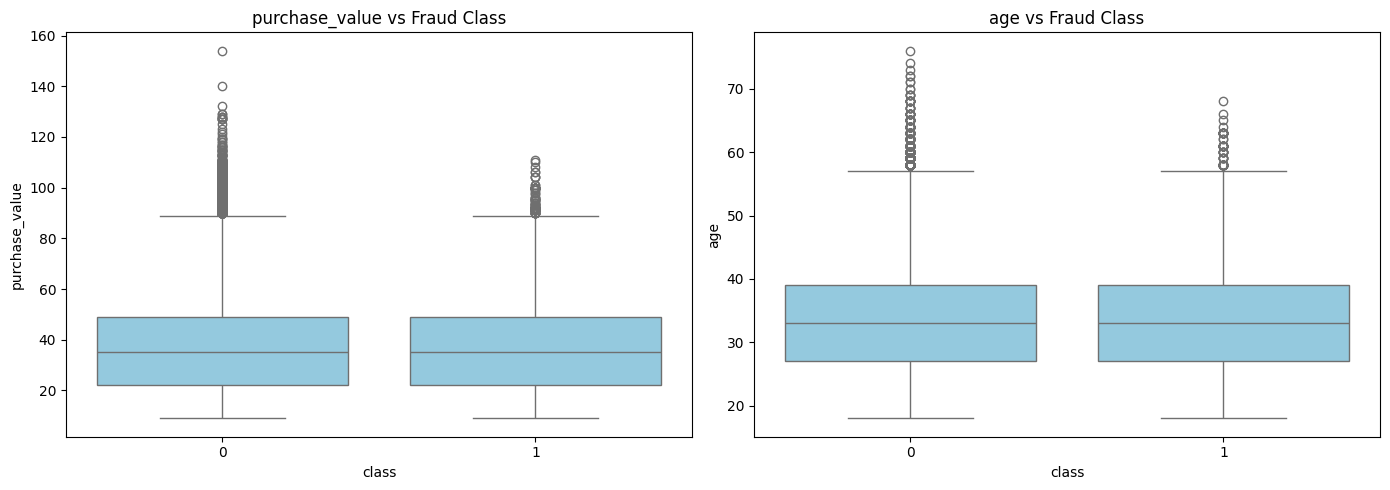

In [17]:
# Step 1: Numerical Features vs Target (Boxplots)

num_cols = ['purchase_value', 'age']  # Add more if needed

fig, axes = plt.subplots(1, len(num_cols), figsize=(14, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(data=fraud_df, x='class', y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col} vs Fraud Class')

plt.tight_layout()
plt.show()


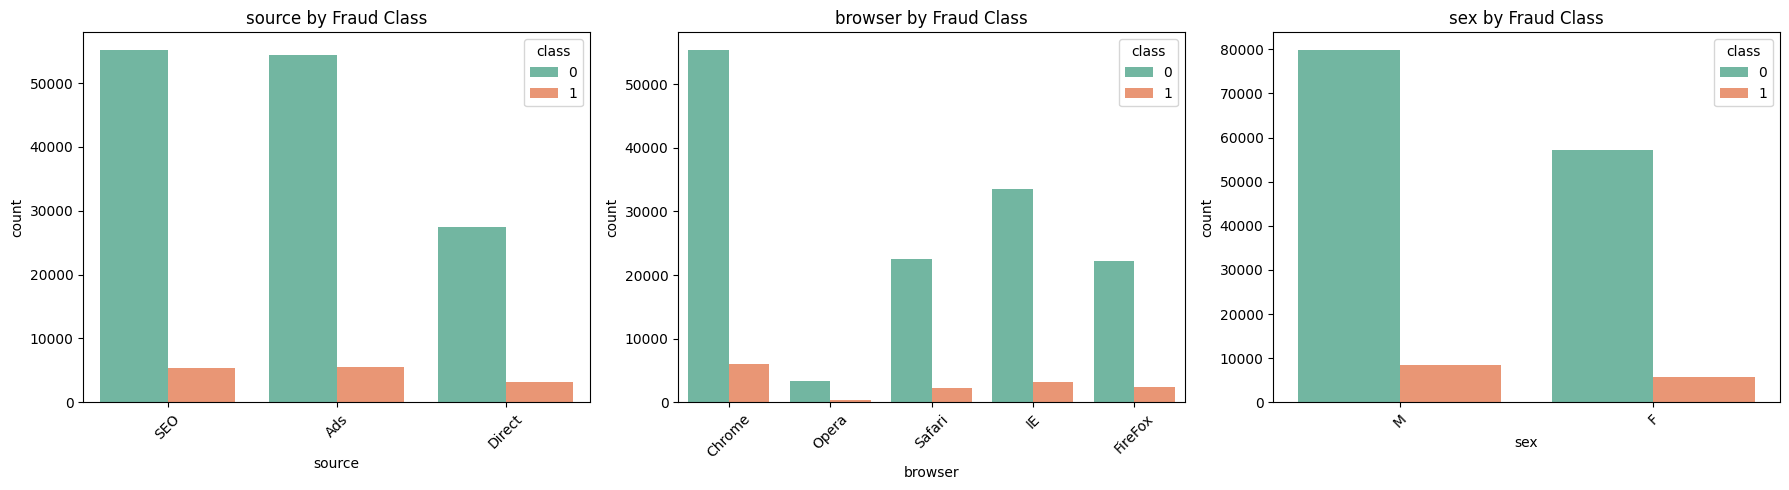

In [18]:
#  Step 2: Categorical Features vs Target (Countplots)
cat_cols = ['source', 'browser', 'sex']

fig, axes = plt.subplots(1, len(cat_cols), figsize=(18, 5))

for i, col in enumerate(cat_cols):
    sns.countplot(data=fraud_df, x=col, hue='class', ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} by Fraud Class')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


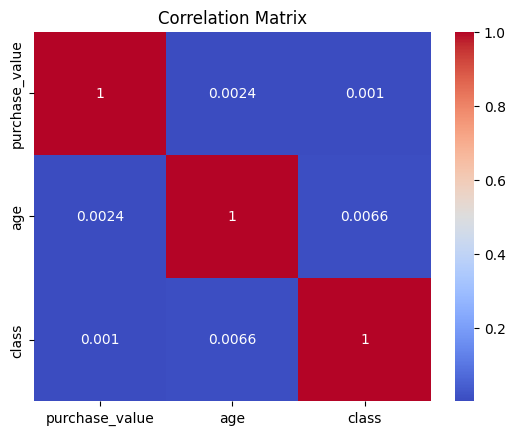

In [19]:
# 3. Correlation Matrix.... for Numerical features ONLY!
df_corr = fraud_df.copy()
df_corr['class'] = df_corr['class'].astype(int)

corr = df_corr[['purchase_value', 'age', 'class']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 🔹 🌍Step 5: Geolocation Analysis via IP Mapping

*  Convert IP addresses in Fraud_Data.csv into integer format

*  Map those integers to countries using IP range data from IpAddress_to_Country.csv

*  Merge the country info back into the main fraud dataset

To incorporate geolocation, IP addresses are converted to integers and mapped to countries based on IP ranges provided.

In [20]:
# Convert IP Addresses to Integer Format

import ipaddress

# 1. Convert all IPs to integers
fraud_df['ip_int'] = fraud_df['ip_address'].astype(float).astype(int)
ip_df['lower_bound_ip_int'] = ip_df['lower_bound_ip_address'].astype(float).astype(int)
ip_df['upper_bound_ip_int'] = ip_df['upper_bound_ip_address'].astype(float).astype(int)

# 2. Sort for merge_asof
fraud_df = fraud_df.sort_values('ip_int')
ip_df = ip_df.sort_values('lower_bound_ip_int')

# 3. Perform the range join using merge_asof
merged_df = pd.merge_asof(
    fraud_df,
    ip_df,
    left_on='ip_int',
    right_on='lower_bound_ip_int',
    direction='backward'
)

# 4. Filter for rows where the IP is within the upper bound
merged_df = merged_df[merged_df['ip_int'] <= merged_df['upper_bound_ip_int']]


In [21]:
# 5: Inspect and Use the Country Column
# Check result
merged_df[['ip_address', 'ip_int', 'country']].head()


,ip_address,ip_int,country
634,1.677886e+07,16778864,Australia
635,1.684205e+07,16842045,Thailand
636,1.684366e+07,16843656,China
637,1.693873e+07,16938732,China
638,1.697198e+07,16971984,Thailand


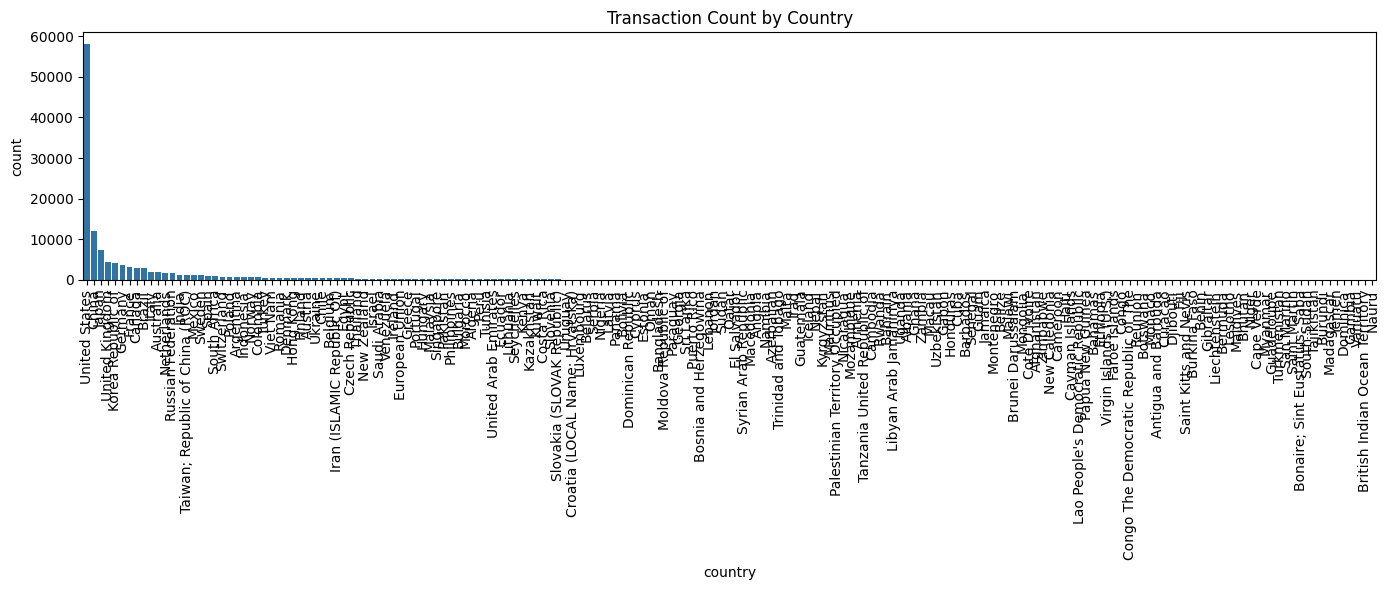

In [22]:

# Total transaction count per country
plt.figure(figsize=(14, 6))
sns.countplot(data=merged_df, x='country', order=merged_df['country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Transaction Count by Country')
plt.tight_layout()
plt.show()


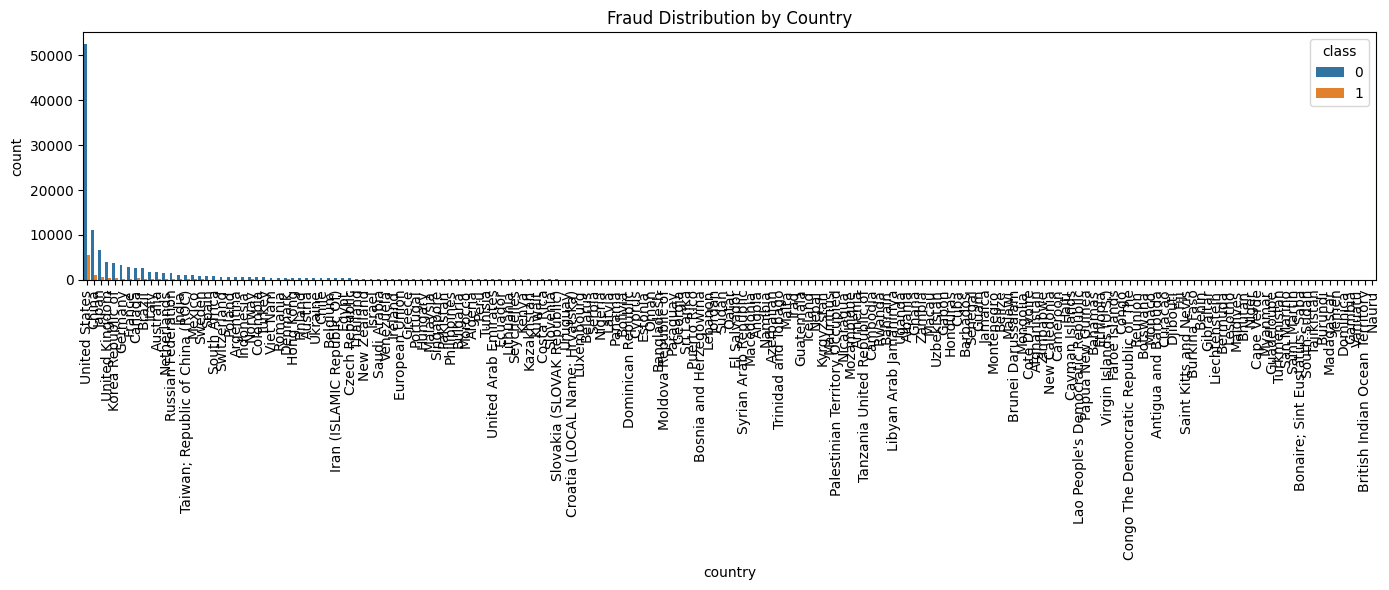

In [23]:
# Fraud distribusion by Country
plt.figure(figsize=(14, 6))
sns.countplot(data=merged_df, x='country', hue='class', order=merged_df['country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Fraud Distribution by Country')
plt.tight_layout()
plt.show()


In [24]:
merged_df['country'].value_counts().tail(10)


country
South Sudan                       1
Tajikistan                        1
Burundi                           1
Madagascar                        1
Yemen                             1
Dominica                          1
Gambia                            1
Vanuatu                           1
British Indian Ocean Territory    1
Nauru                             1
Name: count, dtype: int64

### 🔹 Step 6: Feature Engineering (for Fraud_Data.csv)
* Time-based features such as hour of day, day of week, and time since signup are engineered to capture transaction behavior patterns.  
We also calculate user transaction frequency to help detect abnormal activity.


In [25]:

# 1. Transaction Frequency
# Count number of transactions per user
transaction_counts = fraud_df.groupby('user_id')['purchase_time'].count()
fraud_df['user_transaction_count'] = fraud_df['user_id'].map(transaction_counts)

# 2. Time-Based Features
# Convert to datetime if not already done
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Extract hour of the day (0 to 23)
fraud_df['hour_of_day'] = fraud_df['purchase_time'].dt.hour

# Extract day of the week (0 = Monday, 6 = Sunday)
fraud_df['day_of_week'] = fraud_df['purchase_time'].dt.dayofweek

# 3. Time Since Signup (in seconds)
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds()


### 🔹 Step 7: Encode Categorical Features
* Machine learning models require numeric input, so categorical variables such as browser, source, and sex are one-hot encoded.


In [26]:
fraud_df = pd.get_dummies(fraud_df, columns=['browser', 'source', 'sex'], drop_first=True)
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,ip_int,user_transaction_count,hour_of_day,day_of_week,time_since_signup,browser_FireFox,browser_IE,browser_Opera,browser_Safari,source_Direct,source_SEO,sex_M
110447,62421,2015-02-16 00:17:05,2015-03-08 10:00:39,46,ZCLZTAJPCRAQX,36,52093.496895,0,52093,1,10,6,1763014.0,False,False,False,True,True,False,True
2589,173212,2015-03-08 04:03:22,2015-03-20 17:23:45,33,YFGYOALADBHLT,30,93447.138961,0,93447,1,17,4,1084823.0,False,True,False,False,False,False,False
16752,242286,2015-05-17 16:45:54,2015-05-26 08:54:34,33,QZNVQTUITFTHH,32,105818.501505,0,105818,1,8,1,749320.0,True,False,False,False,True,False,False
51261,370003,2015-03-03 19:58:39,2015-05-28 21:09:13,33,PIBUQMBIELMMG,40,117566.664867,0,117566,1,21,3,7434634.0,False,True,False,False,False,False,True
17,119824,2015-03-20 00:31:27,2015-04-05 07:31:46,55,WFIIFCPIOGMHT,38,131423.789042,0,131423,1,7,6,1407619.0,False,False,False,True,False,False,True


### 🔹 Step 8: Handle Class Imbalance (Train Set Only)
* Since fraud cases are rare, we apply SMOTE oversampling to the training set only, preserving the original test distribution for unbiased evaluation.


In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = fraud_df.drop(columns=['class', 'user_id', 'device_id', 'ip_address', 'signup_time', 'purchase_time'])
y = fraud_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [28]:
# Let see X_res
X_res

,purchase_value,age,ip_int,user_transaction_count,hour_of_day,day_of_week,time_since_signup,browser_FireFox,browser_IE,browser_Opera,browser_Safari,source_Direct,source_SEO,sex_M
0,11,28,1427383584,1,5,1,3.823915e+06,True,False,False,False,False,False,False
1,43,22,2742229564,1,16,5,9.109884e+06,False,False,False,True,False,False,True
2,12,32,3967925092,1,12,0,5.178423e+06,False,True,False,False,False,True,True
3,81,46,788322671,1,21,1,5.969962e+06,False,False,False,False,False,True,False
4,28,20,3542045623,1,21,5,4.342070e+06,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219131,29,38,984705645,1,5,1,7.763472e+06,False,True,False,False,True,False,True
219132,51,31,1945208769,1,19,0,1.000000e+00,False,False,False,False,False,False,False
219133,18,29,3665694571,1,1,0,6.132571e+06,False,False,False,False,True,True,True
219134,9,26,2339915764,1,23,2,1.000000e+00,False,True,False,False,True,False,False


In [34]:
y_res

0         0
1         0
2         0
3         0
4         0
         ..
219131    1
219132    1
219133    1
219134    1
219135    1
Name: class, Length: 219136, dtype: int64

#### 🔹 Step 9: Normalize Features (for logistic regression)

* For models sensitive to feature scales, such as logistic regression, features are standardized using StandardScaler.


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)


In [40]:
# This is the correct pairing for model training:
X_train_final = X_res_scaled
y_train_final = y_res

# This is the correct test set (unmodified for fair evaluation):
X_test_final = X_test_scaled
y_test_final = y_test


In [ ]:
X_train_final.shape, y_train_final.shape, y_test_final.shape, X_test_final.shape

((219136, 14), (219136,), (30223,), (30223, 14))

In [49]:
import os

# Make sure the directory exists
os.makedirs('..data/processed', exist_ok=True)

# Save the processed training features and labels
pd.DataFrame(X_train_final).to_csv('..data/processed/X_train_final.csv', index=False)
pd.Series(y_train_final).to_csv('..data/processed/y_train_final.csv', index=False, header=True)

# Save the processed test features and labels
pd.DataFrame(X_test_final).to_csv('..data/processed/X_test_final.csv', index=False)
pd.Series(y_test_final).to_csv('..data/processed/y_test_final.csv', index=False, header=True)


Let me some final Preprocesing for credit data as well:

In [47]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import os



# Separate features and target
X_credit = credit_df.drop(columns=["Class"])
y_credit = credit_df["Class"]

# Standardize Time and Amount features
scaler = StandardScaler()
X_credit[["Time", "Amount"]] = scaler.fit_transform(X_credit[["Time", "Amount"]])

# Train-test split (stratified)
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(
    X_credit, y_credit, test_size=0.2, stratify=y_credit, random_state=42
)

# Apply SMOTE on the training set
smote = SMOTE(random_state=42)
X_res_credit, y_res_credit = smote.fit_resample(X_train_credit, y_train_credit)

# Rename for final version
X_train_final_credit = X_res_credit
y_train_final_credit = y_res_credit
X_test_final_credit = X_test_credit
y_test_final_credit = y_test_credit

# Save all processed sets
os.makedirs("..data/processed", exist_ok=True)

X_train_final_credit.to_csv("..data/processed/X_train_final_credit.csv", index=False)
X_test_final_credit.to_csv("..data/processed/X_test_final_credit.csv", index=False)
y_train_final_credit.to_csv("..data/processed/y_train_final_credit.csv", index=False)
y_test_final_credit.to_csv("..data/processed/y_test_final_credit.csv", index=False)

print("✅ Saved processed credit dataset as final train/test files.")


✅ Saved processed credit dataset as final train/test files.
